<a href="https://colab.research.google.com/github/yipingcui/Answer_for_Polarr_Data_Scientist_Assignment/blob/master/%E2%80%9CAnswer_for_Polarr_Data_Scientist_Assignment_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect google drive


All data sets and code are stored in google drive. The following code first implements the connection between colab and google drive.

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131294 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
ls

adc.json  drive/  sample_data/


In [0]:
import os
os.chdir("drive/Colab Notebooks")

#Question 1 Getting the Data

In [0]:
!pip install xlsxwriter

Question:Clean up this dataset so that it only contains book entries, and is ordered based on the sales rank.
The following code can be used to clean the data of the first question.Clean up this dataset so that it only contains book entries.
The output file is *dataclean.xlsx*. After sorting according to *salesrank*, convert the file to *csv* format to get the desired data set.

In [0]:
import sys
stdi,stdo,stde=sys.stdin,sys.stdout,sys.stderr
reload(sys)
sys.stdin,sys.stdout,sys.stderr=stdi,stdo,stde 
sys.setdefaultencoding('utf-8')
import re
import datetime
import xlsxwriter

starttimerun = datetime.datetime.now()

cleandata = xlsxwriter.Workbook('dataclean.xlsx')
sheet = cleandata.add_worksheet('sheet 1')
 # indexing is zero based, row then column
header = [u'Id',u'ASIN',u'title',u'salesrank']
i = 0
for each_header in header:
    sheet.write(0,i,each_header)
    i += 1
    
    
row = 1
file = 'amazon-meta.txt'
with open(file,'r') as f:
     for line in f.readlines():
          if re.findall(r"^Id",line):
              sheet.write(row,0, line.replace('Id:','').replace('\n','')
                          .replace(' ',''))
          elif re.findall(r"^ASIN",line):
              sheet.write(row,1, line.replace('ASIN:','').replace('\n','')
                          .replace(' ',''))
          elif re.findall(r"title", line):
              sheet.write(row, 2, line.replace('title:','').replace('\n',''))
          elif re.findall(r"salesrank", line):
              sheet.write(row, 3, line.replace('salesrank:','').replace('\n','')
                          .replace(' ',''))
              row +=1
     else:
          print("end")
         
endtimerun = datetime.datetime.now()
print("calculationtime:")
print (endtimerun - starttimerun).seconds

starttimesave = datetime.datetime.now()
cleandata.close()
endtimesave = datetime.datetime.now()
print ("storagetime:")
print (endtimesave - starttimesave).seconds

end
calculationtime:
120
storagetime:
58


Convert file types to *csv* format by excel. Sorted by *salesrank* in excel and stored in google drive. The following code runs as the first 5 lines of content.

In [0]:
import pandas as pd

datashow = pd.read_csv('dataclean.csv',nrows =5)
print(datashow)

       Id        ASIN                                              title  \
0  392331   525445404                       Planes (A Unicorn Paperback)   
1  293111  9994537873     The Efl/Esl Job Search Handbook: Included I...   
2  408579   821812718          Algebraic Groups and Modular Lie Algebras   
3    4568   413501000     Favourite Nights and Caught on a Train (Met...   
4  242292  3540971076        How to Measure Angles from Foot Radiographs   

   salesrank  
0    3798351  
1    3796990  
2    3795269  
3    3793303  
4    3788732  


# Question 2 Managing the Data


This question is mainly implemented in Oracle, the construction of the data table and the analysis of the problem can be found in the email attachment.


# Question 3 Visualizing the Data

# 3.1  By looking at this visualization, a viewer should be able to tell which book category is the most/least popular.

The book category has roughly seven levels. Based on the final level, there are 10,340 small classifications, and it is difficult to show all categories clearly using the traditional Cartesian coordinate system. Therefore, according to the characteristics of the categorization of book categories, it is proposed to use tree maps to realize the visual display of book categories and sales popularity. A tree map represents a hierarchy of book categories, and the area of each block in the figure directly represents the sales volume.

In [0]:
!pip install squarify

  Stored in directory: /root/.cache/pip/wheels/56/0f/f1/825619c5a84fe0818c3361d9bfbe707260facb1e902f355d8c
Successfully built squarify


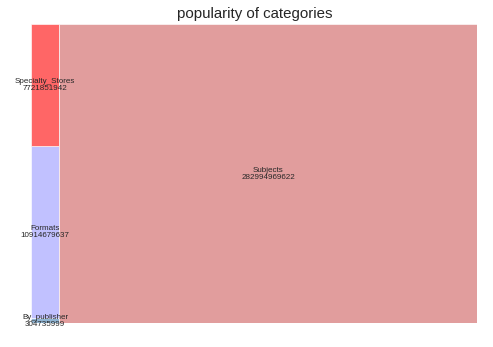

In [0]:
#@title Category Visualization

import matplotlib.pyplot as plt
import squarify

#create data set
category = ['By_publisher','Formats','Specialty_Stores','Subjects']

popularity = [304735999,10914679637,7721851942,282994969622]

colors = ['steelblue','#9999ff','red','indianred','deepskyblue','lime','magenta',
          'violet','peru', 'green','yellow','orange','tomato','lawngreen','cyan',
          'darkcyan','dodgerblue','teal','tan','royalblue']
# details of the draw
plot = squarify.plot(sizes = popularity,
label = category,
alpha = 0.6,
color = colors,
value =popularity,
edgecolor = 'white', linewidth = 1)
plt.rc('font',size =10)
plot.set_title('popularity of categories',fontdict={'fontsize':15})
plt.axis('off')
plt.tick_params(top ='off',right='off')
plt.show()

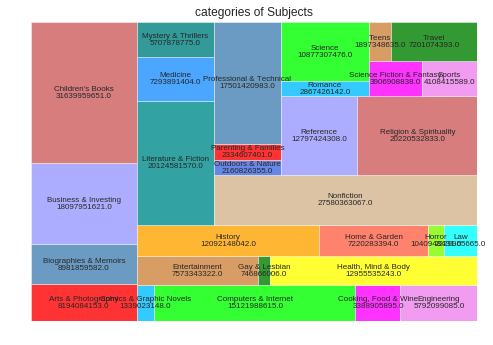

In [0]:
#@title Sub_category Visualization-by subjects

import matplotlib.pyplot as plt
import squarify
import xlrd
import os
from datetime import date,datetime
import seaborn as sns
color = sns.color_palette()

x1 = xlrd.open_workbook(r'secondcategory.xlsx')
sheet = x1.sheet_by_name("secondcategory")
category = sheet.col_values(0)
popularity = sheet.col_values(1)

colors = ['red','steelblue','#9999ff','indianred','deepskyblue','lime',
          'magenta','violet','peru', 'green','yellow','orange','tomato',
          'lawngreen','cyan','darkcyan','dodgerblue','teal','tan','royalblue']
    # details of the draw
plot = squarify.plot(sizes = popularity,
label = category,
alpha = 0.8,
color=colors,
value =popularity,
edgecolor = 'white', linewidth = 0.5)
plt.rc('font',size =8)
plot.set_title('categories of Subjects',fontdict={'fontsize':12})
plt.axis('off')
plt.tick_params(top ='off',right='off')
plt.show()

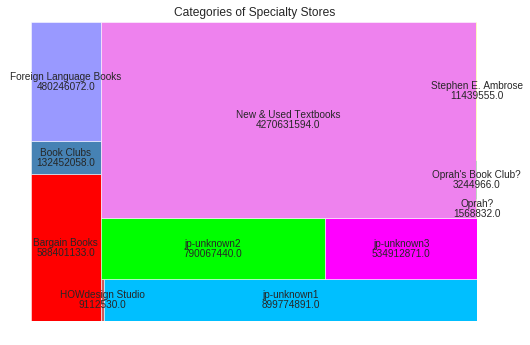

In [0]:
#@title Sub_category Visualization-by specialty stores
import matplotlib.pyplot as plt
import squarify
import xlrd
import os
from datetime import date,datetime

x1 = xlrd.open_workbook(r'secondcategory_specialty.xlsx')
sheet = x1.sheet_by_name("second")
category = sheet.col_values(0)
popularity = sheet.col_values(1)

colors = ['red','steelblue','#9999ff','indianred',
          'deepskyblue','lime','magenta','violet','peru',
          'green','yellow','orange','tomato','lawngreen',
          'cyan','darkcyan','dodgerblue','teal','tan',
          'royalblue']
    # details of the draw
plot = squarify.plot(sizes = popularity,
label = category,
color=colors,
alpha = 1.0,
value =popularity,
edgecolor = 'white', linewidth = 0.5)
plt.rc('font',size =8)
plot.set_title('Categories of Specialty Stores',fontdict={'fontsize':12})
plt.axis('off')
plt.tick_params(top ='off',right='off')
plt.show()


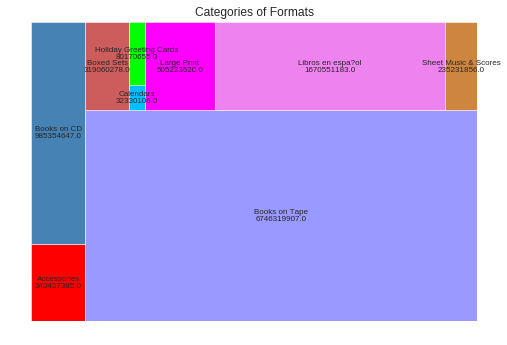

In [0]:
#@title Sub_category Visualization-by formats
import matplotlib.pyplot as plt
import squarify
import xlrd
import os
from datetime import date,datetime

x1 = xlrd.open_workbook(r'formats.xlsx')
sheet = x1.sheet_by_name("formats")
category = sheet.col_values(0)
popularity = sheet.col_values(1)

colors = ['red','steelblue','#9999ff','indianred',
          'deepskyblue','lime','magenta','violet',
          'peru', 'green','yellow','orange','tomato',
          'lawngreen','cyan','darkcyan','dodgerblue',
          'teal','tan','royalblue']
    # details of the draw
plot = squarify.plot(sizes = popularity,
label = category,
color=colors,
alpha = 1.0,
value =popularity,
edgecolor = 'white', linewidth = 0.5)
plt.rc('font',size =8)
plot.set_title('Categories of Formats',fontdict={'fontsize':12})
plt.axis('off')
plt.tick_params(top ='off',right='off')
plt.show()

#3.2 A viewer should be able to tell which book category is the most/least popular at which year. 

The problem is solved by  Oracle and Excel. Full solution can be seen in the attachment in the email. 

#3.3 If you're a book publisher executive, how would you use the visual data above to adjust the pricing for each category of your published books to maximize your revenue? If the visual data above doesn't help you answer such question, what other visualizations would you want to see?

The above visualization scheme can realize the adjustment of the book price. For book categories with a significant increase in sales, prices can be moderately increased based on actual growth. For books with reduced sales, especially in the recently sharp-reduced categories, prices should be appropriately lowered to promote consumption.
The above visualization scheme can also be optimized by dynamic display of sub-categories.

# Question 4 Analyzing the Data

#4.1Given an arbitrary title, for example, "Night of Many Dreams : A Novel", write a function predict when and if this item was on sale at a discount.

In [0]:
import xlrd
import re
from itertools import chain
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

#build dataset, construct word vector
dataclean = xlrd.open_workbook(r'ifandwhen_title_sample.xlsx')
sheet = dataclean.sheet_by_name("Sheet1")

datacleantest = xlrd.open_workbook(r'test.xlsx')
sheet_test = datacleantest.sheet_by_name("Sheet1")

title = sheet.col_values(0)
iaw = sheet.col_values(1)

i = 0
j0 = 0
j1 = 0
j2 = 0
j3 = 0
j4 = 0

p0 = []
p1 = []
p2 = []
p3 = []
p4 = []

#for i< 307454:

for i in range(0, 292439, 1):
    if iaw[i] == 'n':
        p0.append(re.split(' ',title[i]))
        i += 1
    elif iaw[i] == 2006:
        p1.append(re.split(' ', title[i]))
        i += 1
    elif iaw[i] == 2007:
        p2.append(re.split(' ',title[i]))
        i += 1
    elif iaw[i] == 2008:
        p3.append(re.split(' ', title[i]))
        i += 1
    elif iaw[i] == 2010:
        p4.append(re.split(' ', title[i]))
        i += 1
else:
    p0 = list(chain.from_iterable(p0))
    p1 = list(chain.from_iterable(p1))
    p2 = list(chain.from_iterable(p2))
    p3 = list(chain.from_iterable(p3))
    p4 = list(chain.from_iterable(p4))

    pl0 = len(p0)
    pl1 = len(p1)
    pl2 = len(p2)
    pl3 = len(p3)
    pl4 = len(p4)
    y0 = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for j0 in range(0,pl0,1):
        y0.append(1)
        j0 += 1
    else:

     for j1 in range(0, pl1, 1):
         y1.append(2)
         j1 += 1
     else:

      for j2 in range(0, pl2, 1):
          y2.append(3)
          j2 += 1
      else:

       for j3 in range(0, pl3, 1):
           y3.append(4)
           j3 += 1
       else:
        for j4 in range(0, pl4, 1):
            y4.append(5)
            j4 += 1
        else:

         x = p0 + p1 + p2 + p3 + p4
         y = y0 + y1 + y2 + y3 + y4

         title1 = sheet_test.col_values(0)
         iaw1 = sheet_test.col_values(1)

         i1 = 0
         j10 = 0
         j11 = 0
         j12 = 0
         j13 = 0
         j14 = 0

         p10 = []
         p11 = []
         p12 = []
         p13 = []
         p14 = []

         # for i< 307454:
         for i1 in range(0,4999, 1):
             if iaw[i1] == 'n':
                 p10.append(re.split(' ', title[i1]))
                 i1 += 1
             elif iaw[i1] == 2006:
                 p11.append(re.split(' ', title[i1]))
                 i1 += 1
             elif iaw[i1] == 2007:
                 p12.append(re.split(' ', title[i1]))
                 i1 += 1
             elif iaw[i1] == 2008:
                 p13.append(re.split(' ', title[i1]))
                 i += 1
             elif iaw[i1] == 2010:
                 p14.append(re.split(' ', title[i1]))
                 i1 += 1
         else:
             p10 = list(chain.from_iterable(p10))
             p11 = list(chain.from_iterable(p11))
             p12 = list(chain.from_iterable(p12))
             p13 = list(chain.from_iterable(p13))
             p14 = list(chain.from_iterable(p14))

             p1l0 = len(p10)
             p1l1 = len(p11)
             p1l2 = len(p12)
             p1l3 = len(p13)
             p1l4 = len(p14)
             y10 = []
             y11 = []
             y12 = []
             y13 = []
             y14 = []
             for j10 in range(0, p1l0, 1):
                 y10.append(1)
                 j10 += 1
             else:

                 for j11 in range(0, p1l1, 1):
                     y11.append(2)
                     j11 += 1
                 else:

                     for j12 in range(0, p1l2, 1):
                         y12.append(3)
                         j12 += 1
                     else:

                         for j13 in range(0, p1l3, 1):
                             y13.append(4)
                             j13 += 1
                         else:
                             for j14 in range(0, p1l4, 1):
                                 y14.append(5)
                                 j14 += 1
                             else:

                                 x1 = p10 + p11 + p12 + p13 + p14
                                 y1 = y10 + y11 + y12 + y13 + y14

         x_result = [u'Night of Many Dreams : A Novel']
         vec = CountVectorizer()
         x_train = vec.fit_transform(x)
         x_test = vec.fit_transform(x1)
         x_result = vec.transform(x_result)


         clf = MultinomialNB()
         clf.fit(x_train,y) # Classifier
         clf.fit(x_test,y1)

         y_result = clf.predict(x_result)
         y_predict = clf.predict(x_test)
         y_score = clf.score(x_test, y1)


print y_result
print("1: no discount; 2:discount in 2006; 3: discount in 2007; 4: discount in 2008); 5: discount in 2010")
print y_predict
print("accuracy:", y_score)
print("end")

[1]
1: no discount; 2:discount in 2006; 3: discount in 2007; 4: discount in 2008); 5: discount in 2010
[2 2 2 ... 2 1 2]
('accuracy:', 0.5798361854066313)
end


#4.2 Given an arbitrary customer, for example, "ATVPDKIKX0DER", write a function to recommend 5 new movies (DVDs) that this person likely have not already watched but would enjoy.

The problem is solved by Oracle and Excel. Full solution can be seen in the attachment in the email.

#4.3 (Bonus) Write a function to find all the customers who are most likely to be writing fake reviews. Listing all your assumptions as parameters in your code.

The problem is solved by Oracle and Excel. Full solution can be seen in the email attachment.